In [1]:
# Reload the notebook automatically
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torchvision
import cv2
import numpy as np
from pathlib import Path
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import torchvision.models as models
import random
from tensorboardX import SummaryWriter
import cv2

from dataset import *
from transforms import *
from discriminator import *

In [3]:
exp = 'exp3'
epoch = 49

In [4]:
cfg = parse('/mnt/4TB/aaron/verify_hand_crop_disc/config_{}.cfg'.format(exp))

model_type = cfg['model']

if model_type == 'dcgan':
    model = DCGAN_Discriminator().cuda()

model = model.eval()

In [5]:
map_loc = 'cuda:0'
load_dir = Path(ROOT)/'verify_hand_crop_disc'/'data'/'{}'.format(exp)/'model_verify_hand_disc_{}.state'.format(epoch)
ckpt = torch.load(load_dir, map_location=map_loc)
model.load_state_dict(ckpt['model_state_dict'])


cfg['aug'] = False

dataset = FPHA_Hand_Crop_Dataset(cfg, 'test')

kwargs = {
    'batch_size'    : 1,
    'shuffle'       : cfg['shuffle'],
    'num_workers'   : int(cfg['num_workers']),
    'sampler'       : None,
    'pin_memory'    : True
}

dataloader = torch.utils.data.DataLoader(dataset, **kwargs)

# Inference

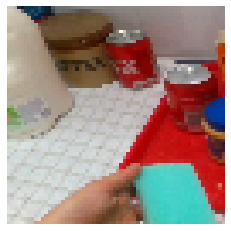

GT 0
Pred 0.0024291211739182472
True Negative


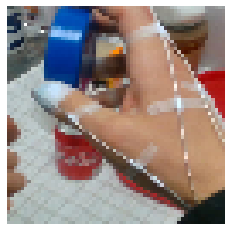

GT 1
Pred 0.9944960474967957
True Positive


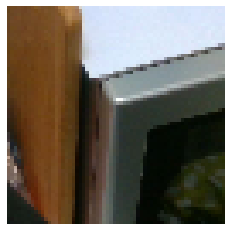

GT 0
Pred 0.03059954009950161
True Negative


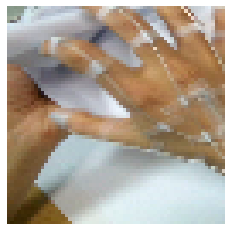

GT 0
Pred 0.21461652219295502
True Negative


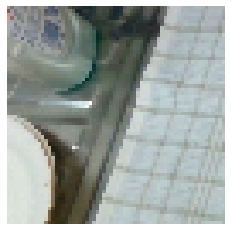

GT 0
Pred 0.03213263303041458
True Negative


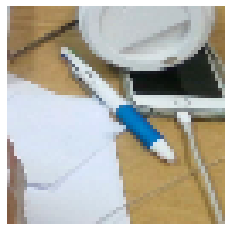

GT 0
Pred 0.00018597325833979994
True Negative


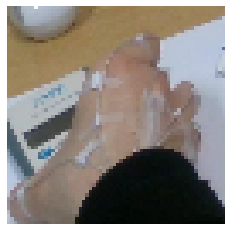

GT 1
Pred 0.8141677379608154
True Positive


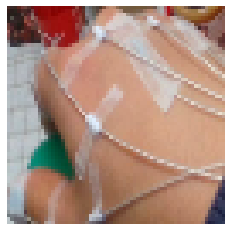

GT 1
Pred 0.9945915341377258
True Positive


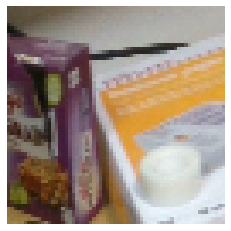

GT 0
Pred 0.014807512983679771
True Negative


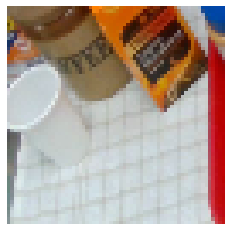

GT 0
Pred 0.012336444109678268
True Negative


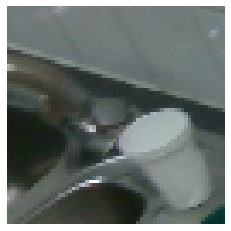

GT 0
Pred 0.003047088859602809
True Negative


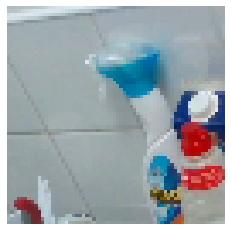

GT 0
Pred 0.0010740275029093027
True Negative


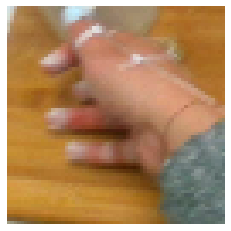

GT 1
Pred 0.5228747129440308
True Positive


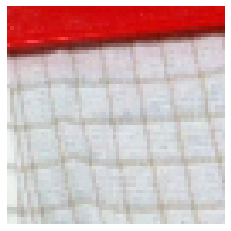

GT 0
Pred 0.026587460190057755
True Negative


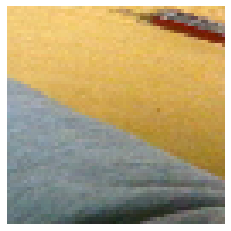

GT 0
Pred 0.025847729295492172
True Negative


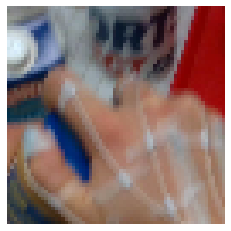

GT 1
Pred 0.933964729309082
True Positive


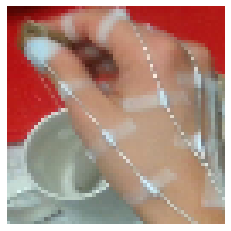

GT 1
Pred 0.9979516863822937
True Positive


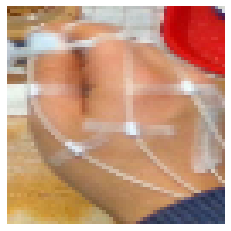

GT 1
Pred 0.9948126077651978
True Positive


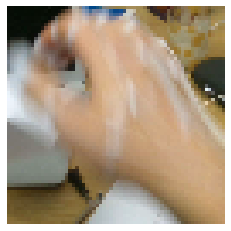

GT 1
Pred 0.9902922511100769
True Positive


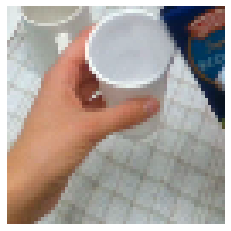

GT 0
Pred 0.4269734025001526
True Negative


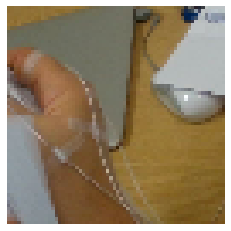

GT 0
Pred 0.7909944653511047
False Positive


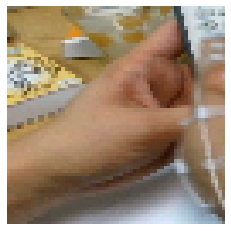

GT 0
Pred 0.15164920687675476
True Negative


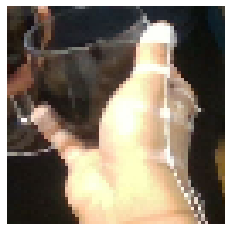

GT 1
Pred 0.9945220947265625
True Positive


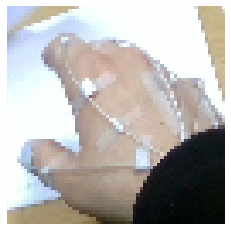

GT 1
Pred 0.9973440766334534
True Positive


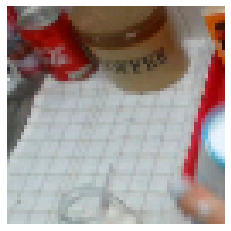

GT 0
Pred 0.0022620772942900658
True Negative


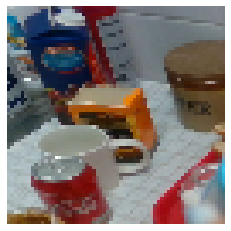

GT 0
Pred 0.0063522495329380035
True Negative


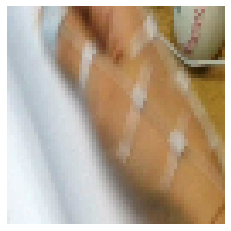

GT 1
Pred 0.9783743619918823
True Positive


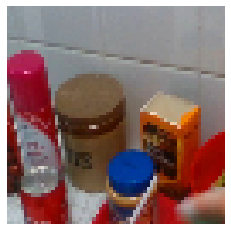

GT 0
Pred 0.004356286954134703
True Negative


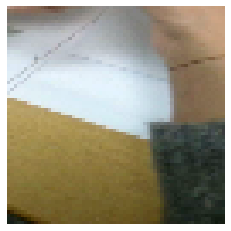

GT 0
Pred 0.14489483833312988
True Negative


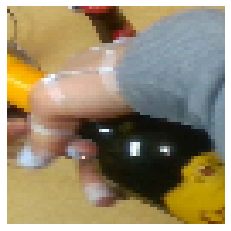

GT 1
Pred 0.013390133157372475
False Negative


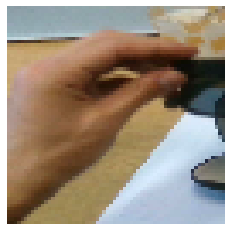

GT 0
Pred 0.002193441614508629
True Negative


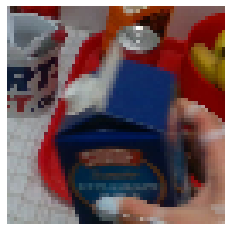

GT 0
Pred 0.023044230416417122
True Negative


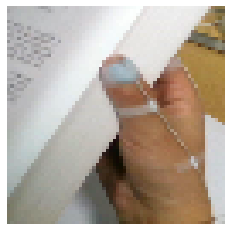

GT 1
Pred 0.4439525306224823
False Negative


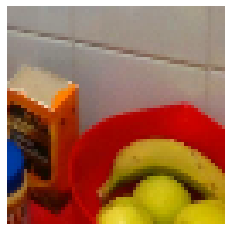

GT 0
Pred 0.00415831059217453
True Negative


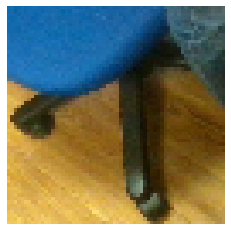

GT 0
Pred 0.0013117421185597777
True Negative


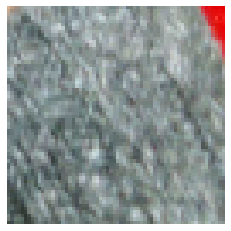

GT 0
Pred 0.07035482674837112
True Negative


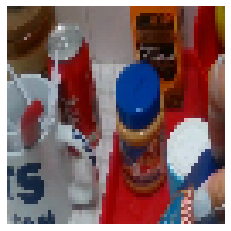

GT 0
Pred 0.015228821896016598
True Negative


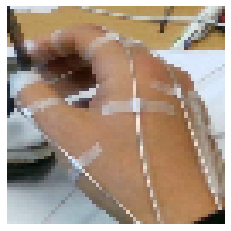

GT 1
Pred 0.992626965045929
True Positive


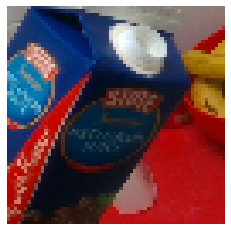

GT 0
Pred 0.04617635905742645
True Negative


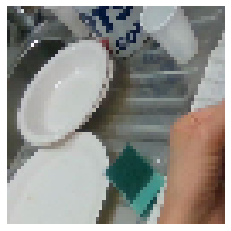

GT 0
Pred 0.010267090983688831
True Negative


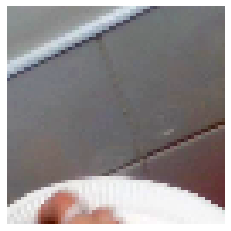

GT 0
Pred 0.0025939990300685167
True Negative


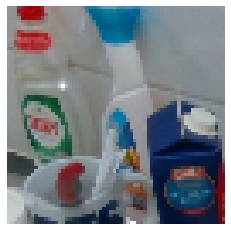

GT 0
Pred 0.07612577825784683
True Negative


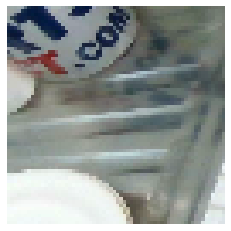

GT 0
Pred 0.010132066905498505
True Negative


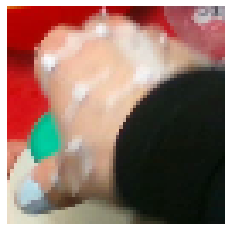

GT 1
Pred 0.99459308385849
True Positive


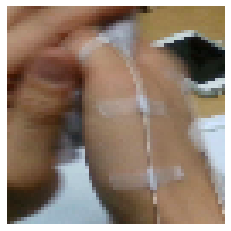

GT 1
Pred 0.8715691566467285
True Positive


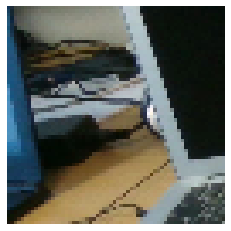

GT 0
Pred 0.031077036634087563
True Negative


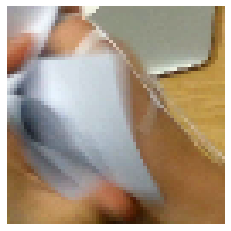

GT 1
Pred 0.14353667199611664
False Negative


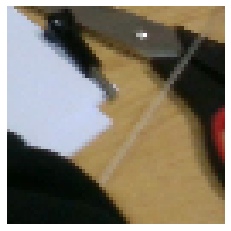

GT 0
Pred 0.4166906177997589
True Negative


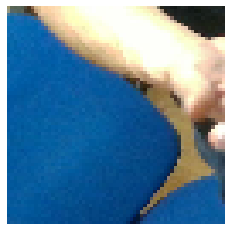

GT 0
Pred 0.0018015775131061673
True Negative


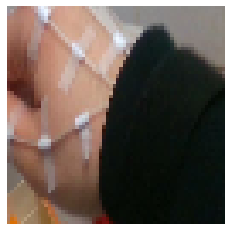

GT 1
Pred 0.8672212958335876
True Positive


In [6]:
for i in range(50):
    data_load = next(iter(dataloader))
    img_crop, is_hand = data_load
    img_crop_numpy = ImgToNumpy()(img_crop)

    idx = 0
    img = img_crop_numpy[idx].copy()
    cur_is_hand = is_hand[idx].item()

    fig, ax = plt.subplots()
    ax.imshow(img)
    plt.axis('off')
    plt.show()

    img_crop_cuda = img_crop.cuda()
    out = model(img_crop_cuda)
    out = out.squeeze()

    print('GT', cur_is_hand)
    print('Pred', out.item())
    thresh = 0.5
    if out > thresh and cur_is_hand == 1:
        print('True Positive')
    elif out > thresh and cur_is_hand == 0:
        print('False Positive')
    elif out < thresh and cur_is_hand == 1:
        print('False Negative')
    elif out < thresh and cur_is_hand == 0:
        print('True Negative')

# Custom test

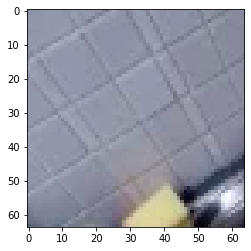

PRED: 0.0015566592337563634


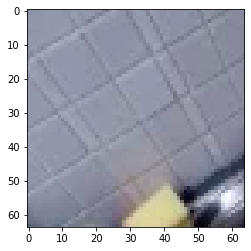

PRED: 0.0015566592337563634


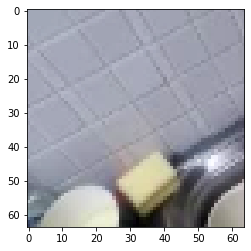

PRED: 0.001814276329241693


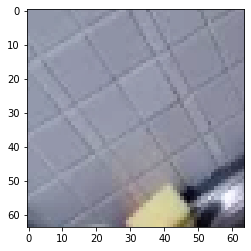

PRED: 0.0015083122998476028


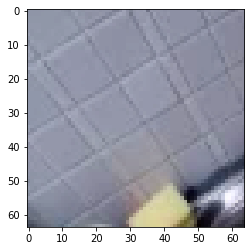

PRED: 0.0013700167182832956


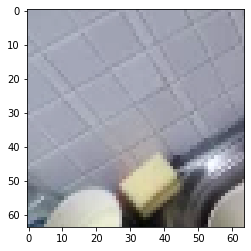

PRED: 0.0015121116302907467


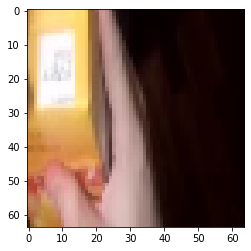

PRED: 0.6681205034255981


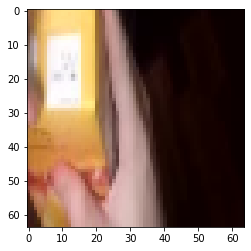

PRED: 0.5570626258850098


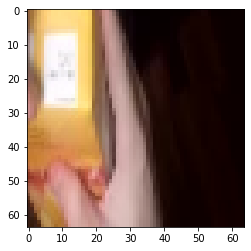

PRED: 0.6489271521568298


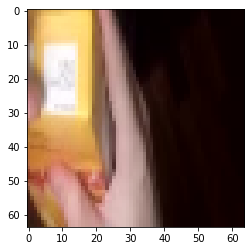

PRED: 0.6016446948051453


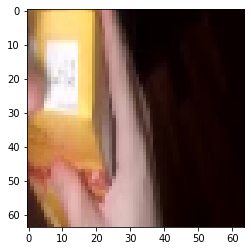

PRED: 0.6442533135414124


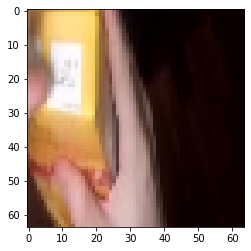

PRED: 0.6266650557518005


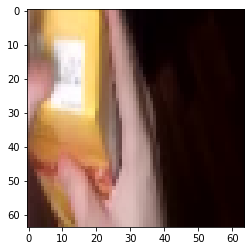

PRED: 0.7603763341903687


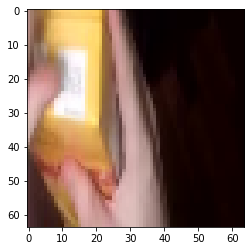

PRED: 0.7448559403419495


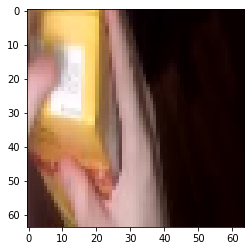

PRED: 0.764635443687439


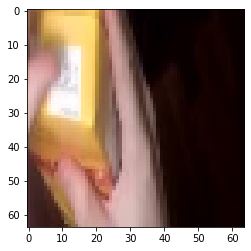

PRED: 0.7262417674064636


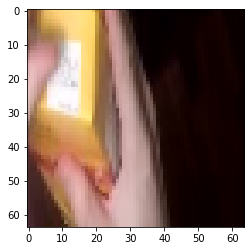

PRED: 0.7610368132591248


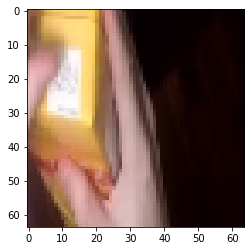

PRED: 0.6983206868171692


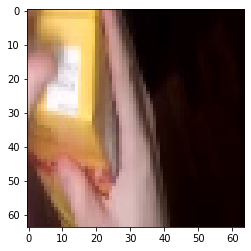

PRED: 0.719674825668335


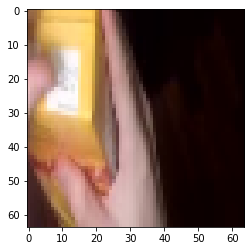

PRED: 0.6710521578788757


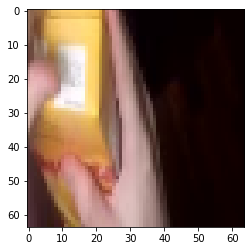

PRED: 0.7227583527565002


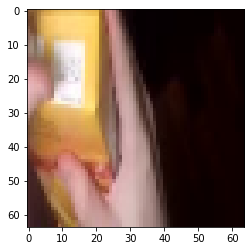

PRED: 0.7430363893508911


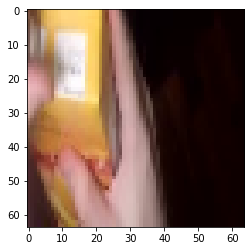

PRED: 0.8282151818275452


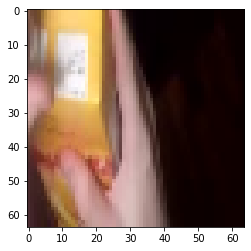

PRED: 0.8135266900062561


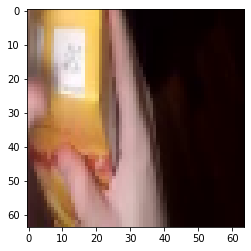

PRED: 0.8321415185928345


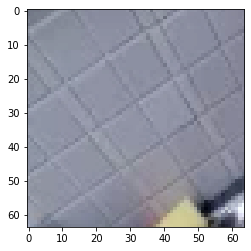

PRED: 0.0010757374111562967


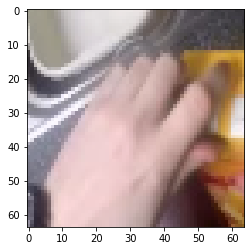

PRED: 0.34067776799201965


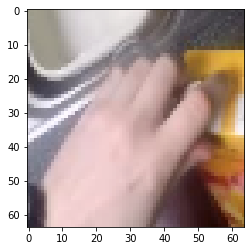

PRED: 0.17014135420322418


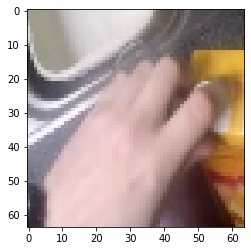

PRED: 0.16384421288967133


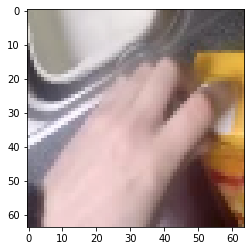

PRED: 0.17884302139282227


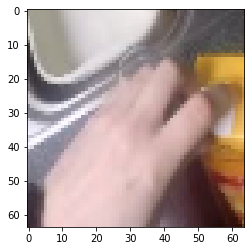

PRED: 0.17368575930595398


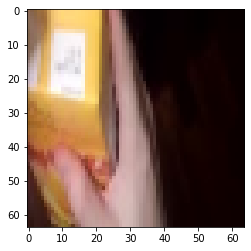

PRED: 0.6808826923370361


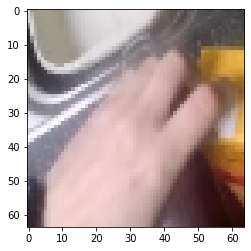

PRED: 0.3804068863391876


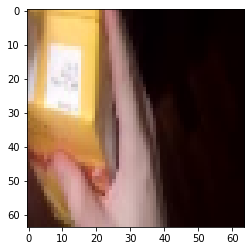

PRED: 0.5717443823814392


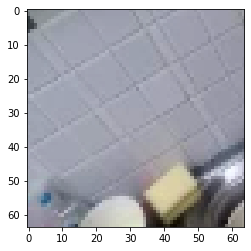

PRED: 0.002583674853667617


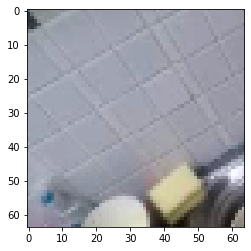

PRED: 0.0018748848233371973


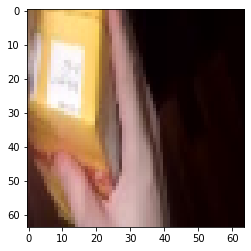

PRED: 0.7055759429931641


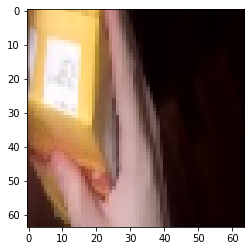

PRED: 0.7346684336662292


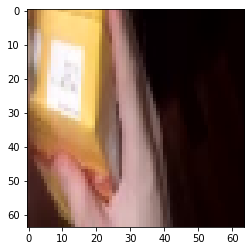

PRED: 0.7168149948120117


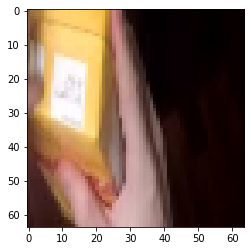

PRED: 0.6955927014350891


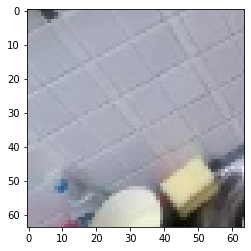

PRED: 0.001337620080448687


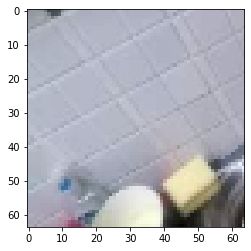

PRED: 0.0014220522716641426


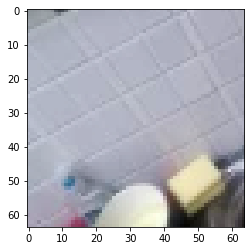

PRED: 0.0009668385609984398


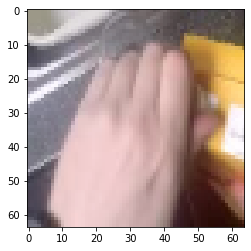

PRED: 0.6504142880439758


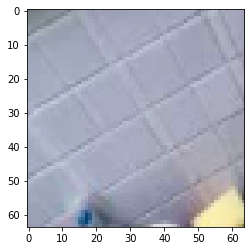

PRED: 0.0011175600811839104


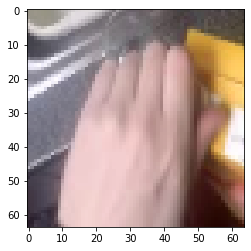

PRED: 0.6333974599838257


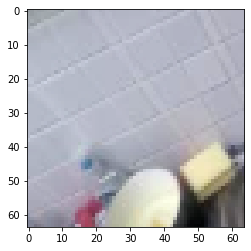

PRED: 0.0006506664794869721


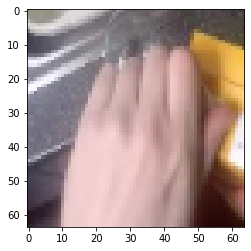

PRED: 0.6742375493049622


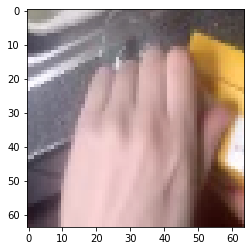

PRED: 0.6271460652351379


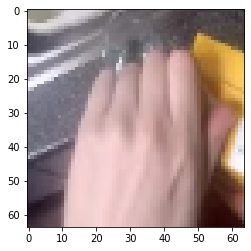

PRED: 0.7013317942619324


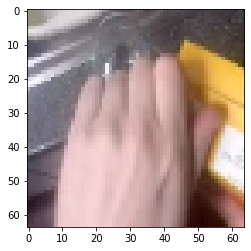

PRED: 0.5493236780166626


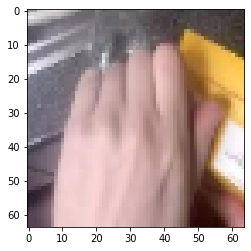

PRED: 0.7210128307342529


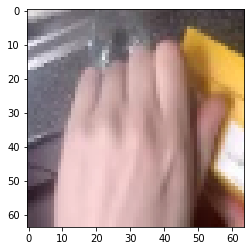

PRED: 0.7730761170387268


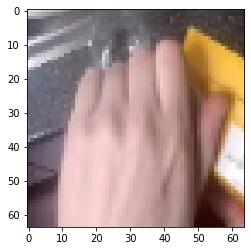

PRED: 0.7380867600440979


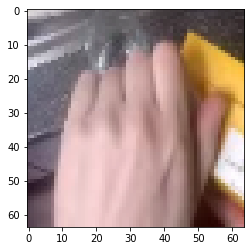

PRED: 0.5191486477851868


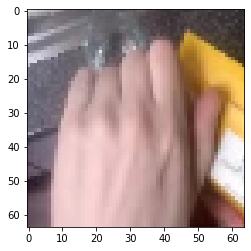

PRED: 0.4755370616912842


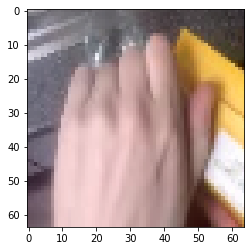

PRED: 0.694771945476532


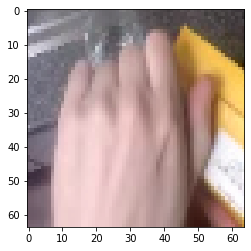

PRED: 0.6524088978767395


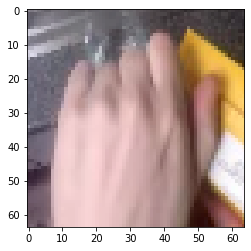

PRED: 0.540772557258606


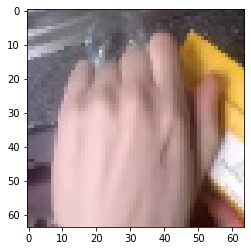

PRED: 0.49769479036331177


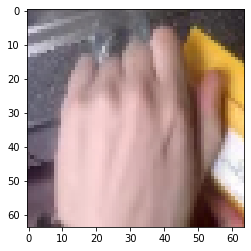

PRED: 0.609362781047821


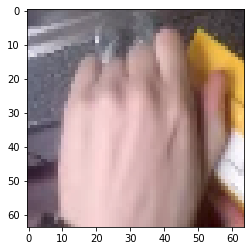

PRED: 0.7091535329818726


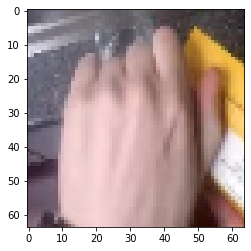

PRED: 0.6893966794013977


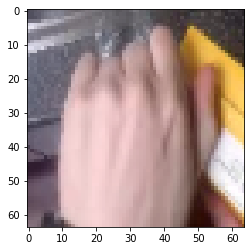

PRED: 0.7156046628952026


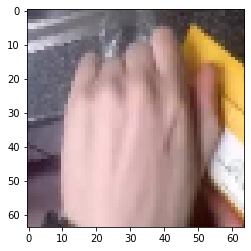

PRED: 0.7428635358810425


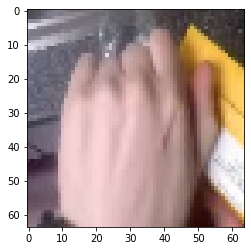

PRED: 0.7408650517463684


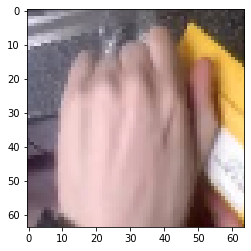

PRED: 0.74445641040802


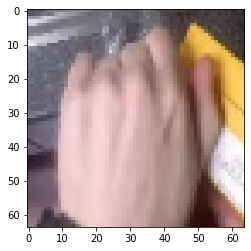

PRED: 0.7280125617980957


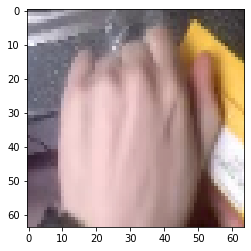

PRED: 0.7743613123893738


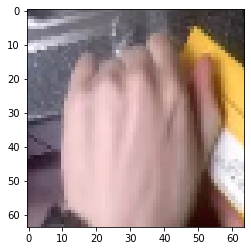

PRED: 0.8697694540023804


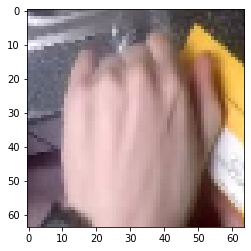

PRED: 0.8905563354492188


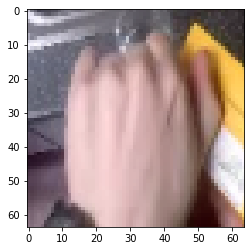

PRED: 0.9172058701515198


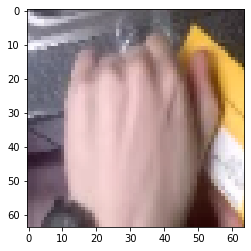

PRED: 0.9269237518310547


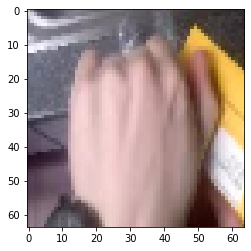

PRED: 0.9214563965797424


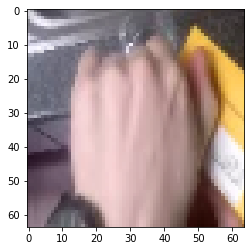

PRED: 0.9161942005157471


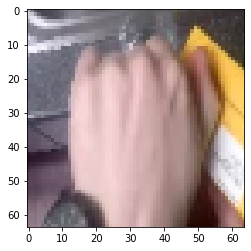

PRED: 0.9447485208511353


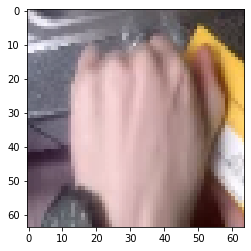

PRED: 0.9732999801635742


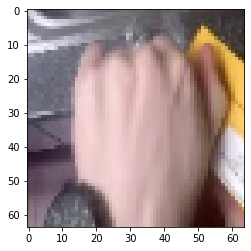

PRED: 0.9734834432601929


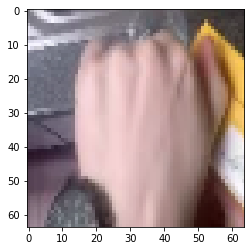

PRED: 0.9747503399848938


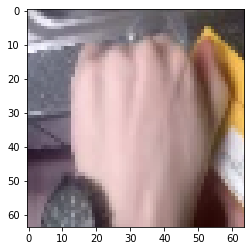

PRED: 0.9854140281677246


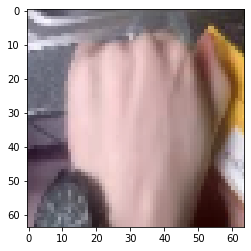

PRED: 0.9931989312171936


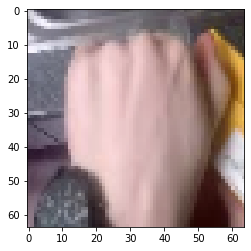

PRED: 0.9920869469642639


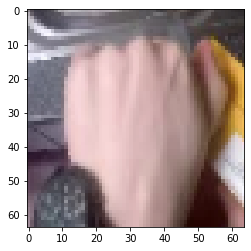

PRED: 0.9840328097343445


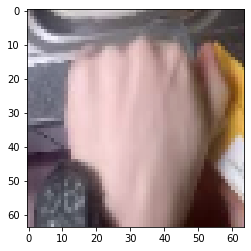

PRED: 0.9869120121002197


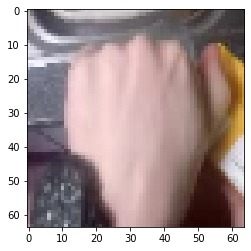

PRED: 0.9906501173973083


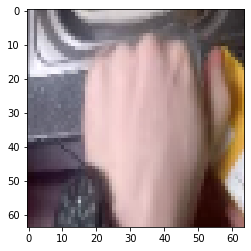

PRED: 0.9773629903793335


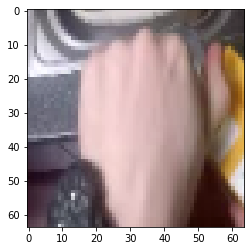

PRED: 0.9812144041061401


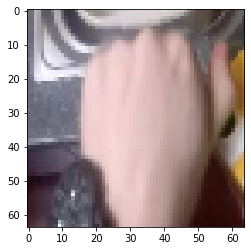

PRED: 0.9907709360122681


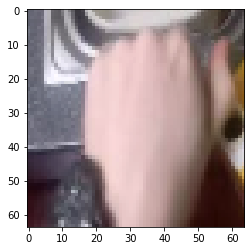

PRED: 0.9953069090843201


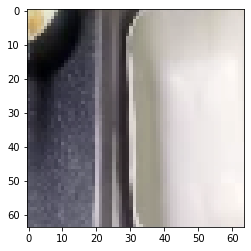

PRED: 0.06353067606687546


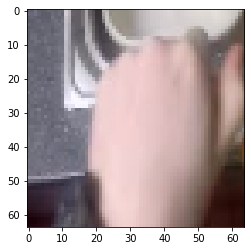

PRED: 0.9963299632072449


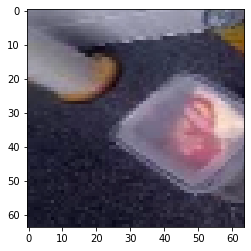

PRED: 0.0186440609395504


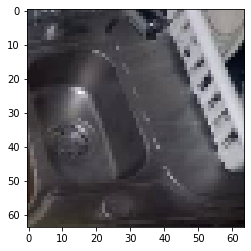

PRED: 0.013021618127822876


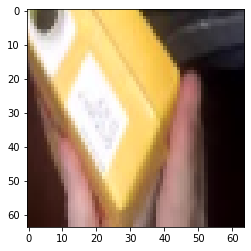

PRED: 0.9902235865592957


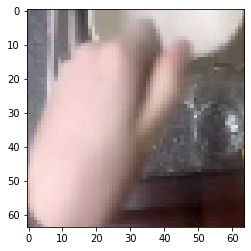

PRED: 0.6858968734741211


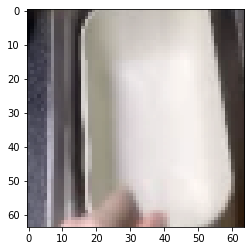

PRED: 0.3824506103992462


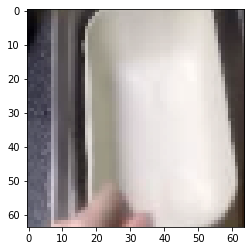

PRED: 0.384168416261673


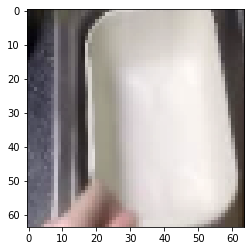

PRED: 0.39716291427612305


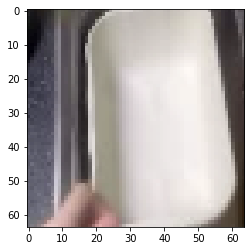

PRED: 0.4345792829990387


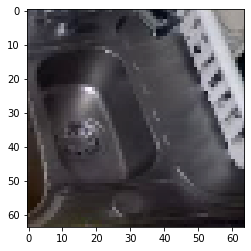

PRED: 0.02238740772008896


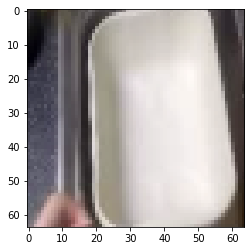

PRED: 0.5055423378944397


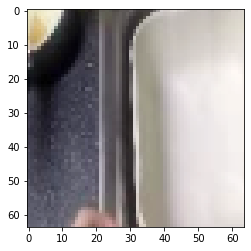

PRED: 0.050795506685972214


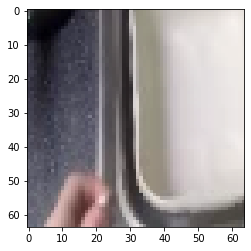

PRED: 0.06931830197572708


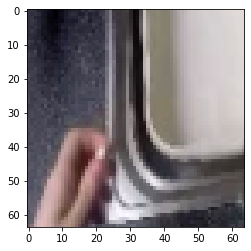

PRED: 0.014282806776463985


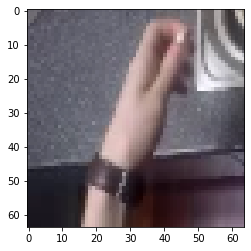

PRED: 0.24524244666099548


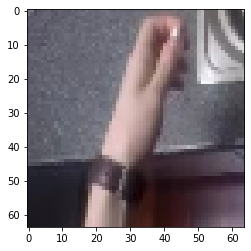

PRED: 0.2192990481853485


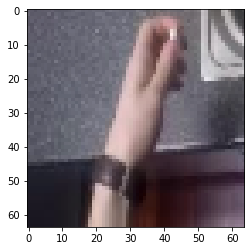

PRED: 0.20651841163635254


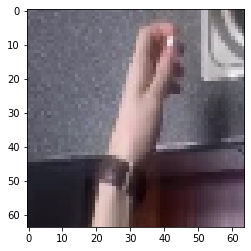

PRED: 0.25885719060897827


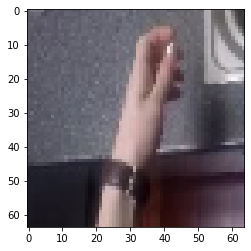

PRED: 0.17641417682170868


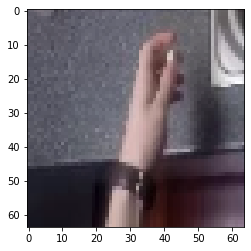

PRED: 0.09188664704561234


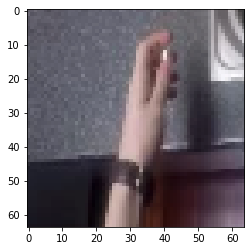

PRED: 0.12137958407402039


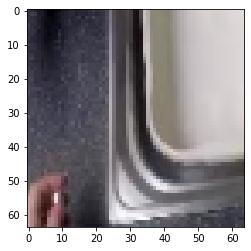

PRED: 0.005346556659787893


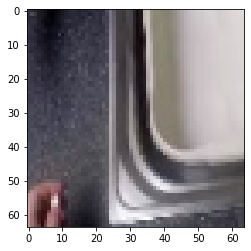

PRED: 0.006549104582518339


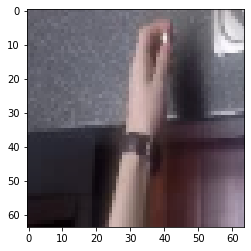

PRED: 0.03160366415977478


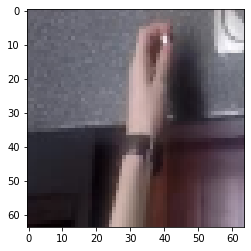

PRED: 0.03556980937719345


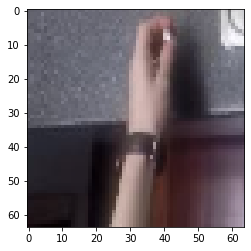

PRED: 0.04427569359540939


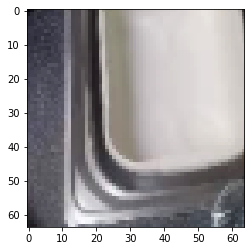

PRED: 0.11690029501914978


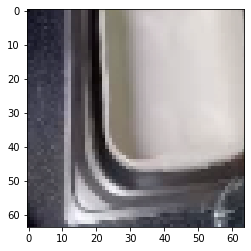

PRED: 0.10414081066846848


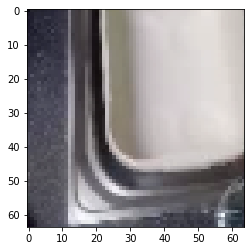

PRED: 0.12484370172023773


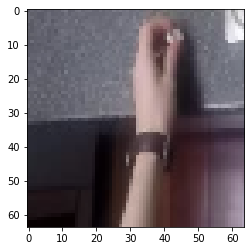

PRED: 0.056520335376262665


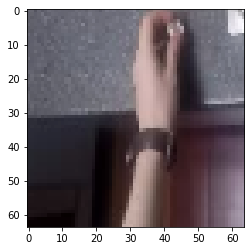

PRED: 0.06772401183843613


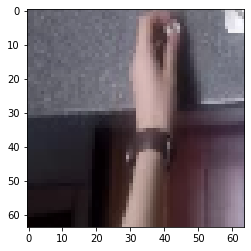

PRED: 0.0532522015273571


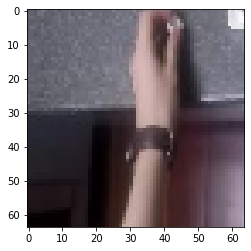

PRED: 0.08242945373058319


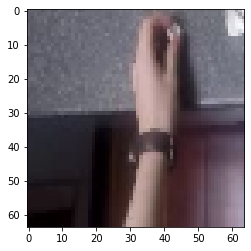

PRED: 0.07815975695848465


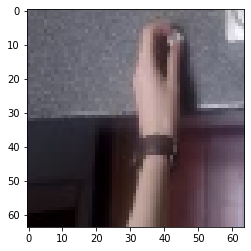

PRED: 0.0763571560382843


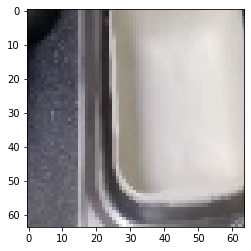

PRED: 0.07082729786634445


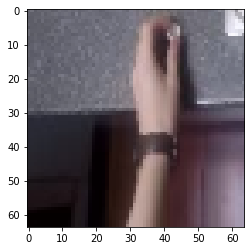

PRED: 0.1174357533454895


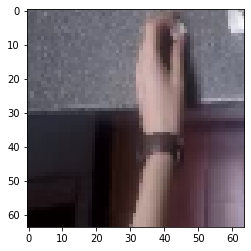

PRED: 0.1507841944694519


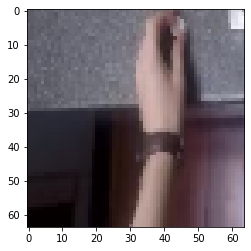

PRED: 0.13911794126033783


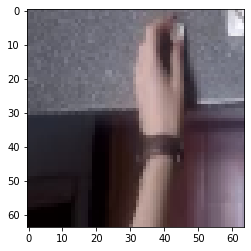

PRED: 0.13127969205379486


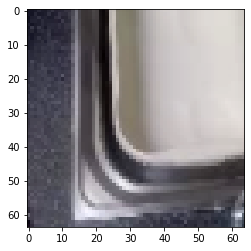

PRED: 0.027170686051249504


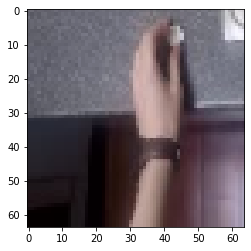

PRED: 0.09432689845561981


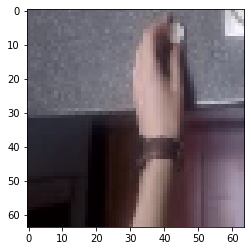

PRED: 0.11908837407827377


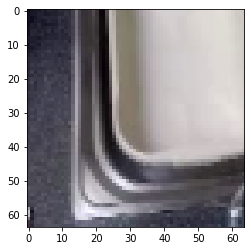

PRED: 0.028123173862695694


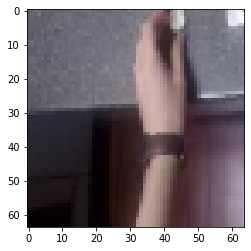

PRED: 0.14455504715442657


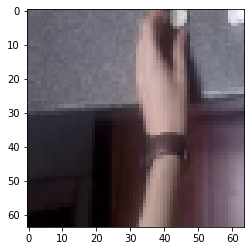

PRED: 0.21208421885967255


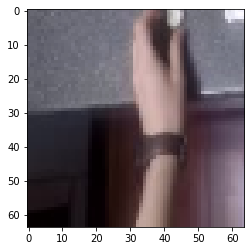

PRED: 0.3277308940887451


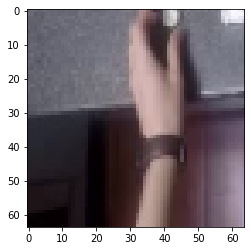

PRED: 0.389335960149765


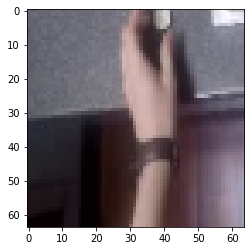

PRED: 0.3208215534687042


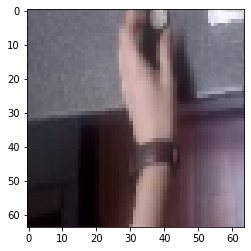

PRED: 0.3188139498233795


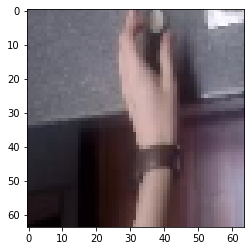

PRED: 0.4530181586742401


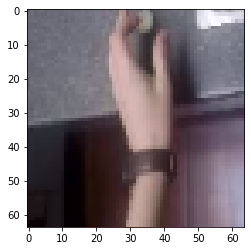

PRED: 0.2681388556957245


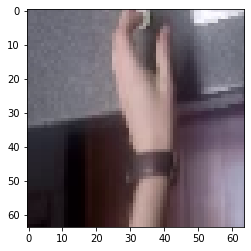

PRED: 0.27027323842048645


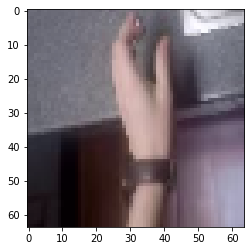

PRED: 0.18681594729423523


In [7]:
for idx in range(144):
    seq_name = 'P03_P03_10_7118_open_juice'
    img_name = 'detect_{}_fpha_hpo_hand_exp1_200_eval_{}.png'.format(seq_name, idx)
    img = cv2.imread('/mnt/4TB/aaron/mlcv-exp/data/saved/{}/{}'.format(seq_name, img_name))[:, :, ::-1]

    tfrm = []
    img_rsz = 64
    tfrm.append(ImgResize((img_rsz)))
    tfrm.append(ImgToTorch())
    transform = torchvision.transforms.Compose(tfrm)

    sample          = {'img': img}
    sample          = transform(sample)
    sample_img      = sample['img'].unsqueeze(0)
    img_numpy = ImgToNumpy()(sample_img)[0]

    fig, ax = plt.subplots()
    ax.imshow(img_numpy)
    plt.show()

    img_cuda = sample_img.cuda()
    out = model(img_cuda)
    out = out.squeeze()
    print('PRED:', out.item())